In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading the Data
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


No Null Values

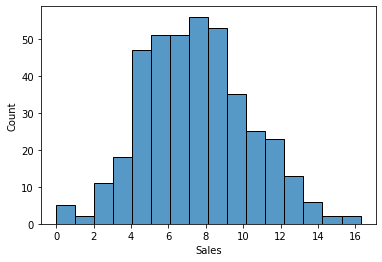

In [4]:
sns.histplot(df.Sales);

In [5]:
def filt(x):
    if x <= np.mean(df.Sales):
        return 'Low Sale'
    else: 
        return 'High Sale'

In [6]:
df['sales_cat'] = df['Sales'].copy()
df['sales_cat'] = df['sales_cat'].apply(filt)

df.pop('Sales')

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sale
1,111,48,16,260,83,Good,65,10,Yes,Yes,High Sale
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sale
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sale
4,141,64,3,340,128,Bad,38,13,Yes,No,Low Sale


In [7]:
df.sales_cat.value_counts()

Low Sale     201
High Sale    199
Name: sales_cat, dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder()

df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc']) 

df['Urban'] = label_encoder.fit_transform(df['Urban']) 

df['US'] = label_encoder.fit_transform(df['US']) 

df['sales_cat'] = label_encoder.fit_transform(df['sales_cat'])

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [9]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,0.50250
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.50062
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.00000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.00000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,1.00000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,1.00000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.00000


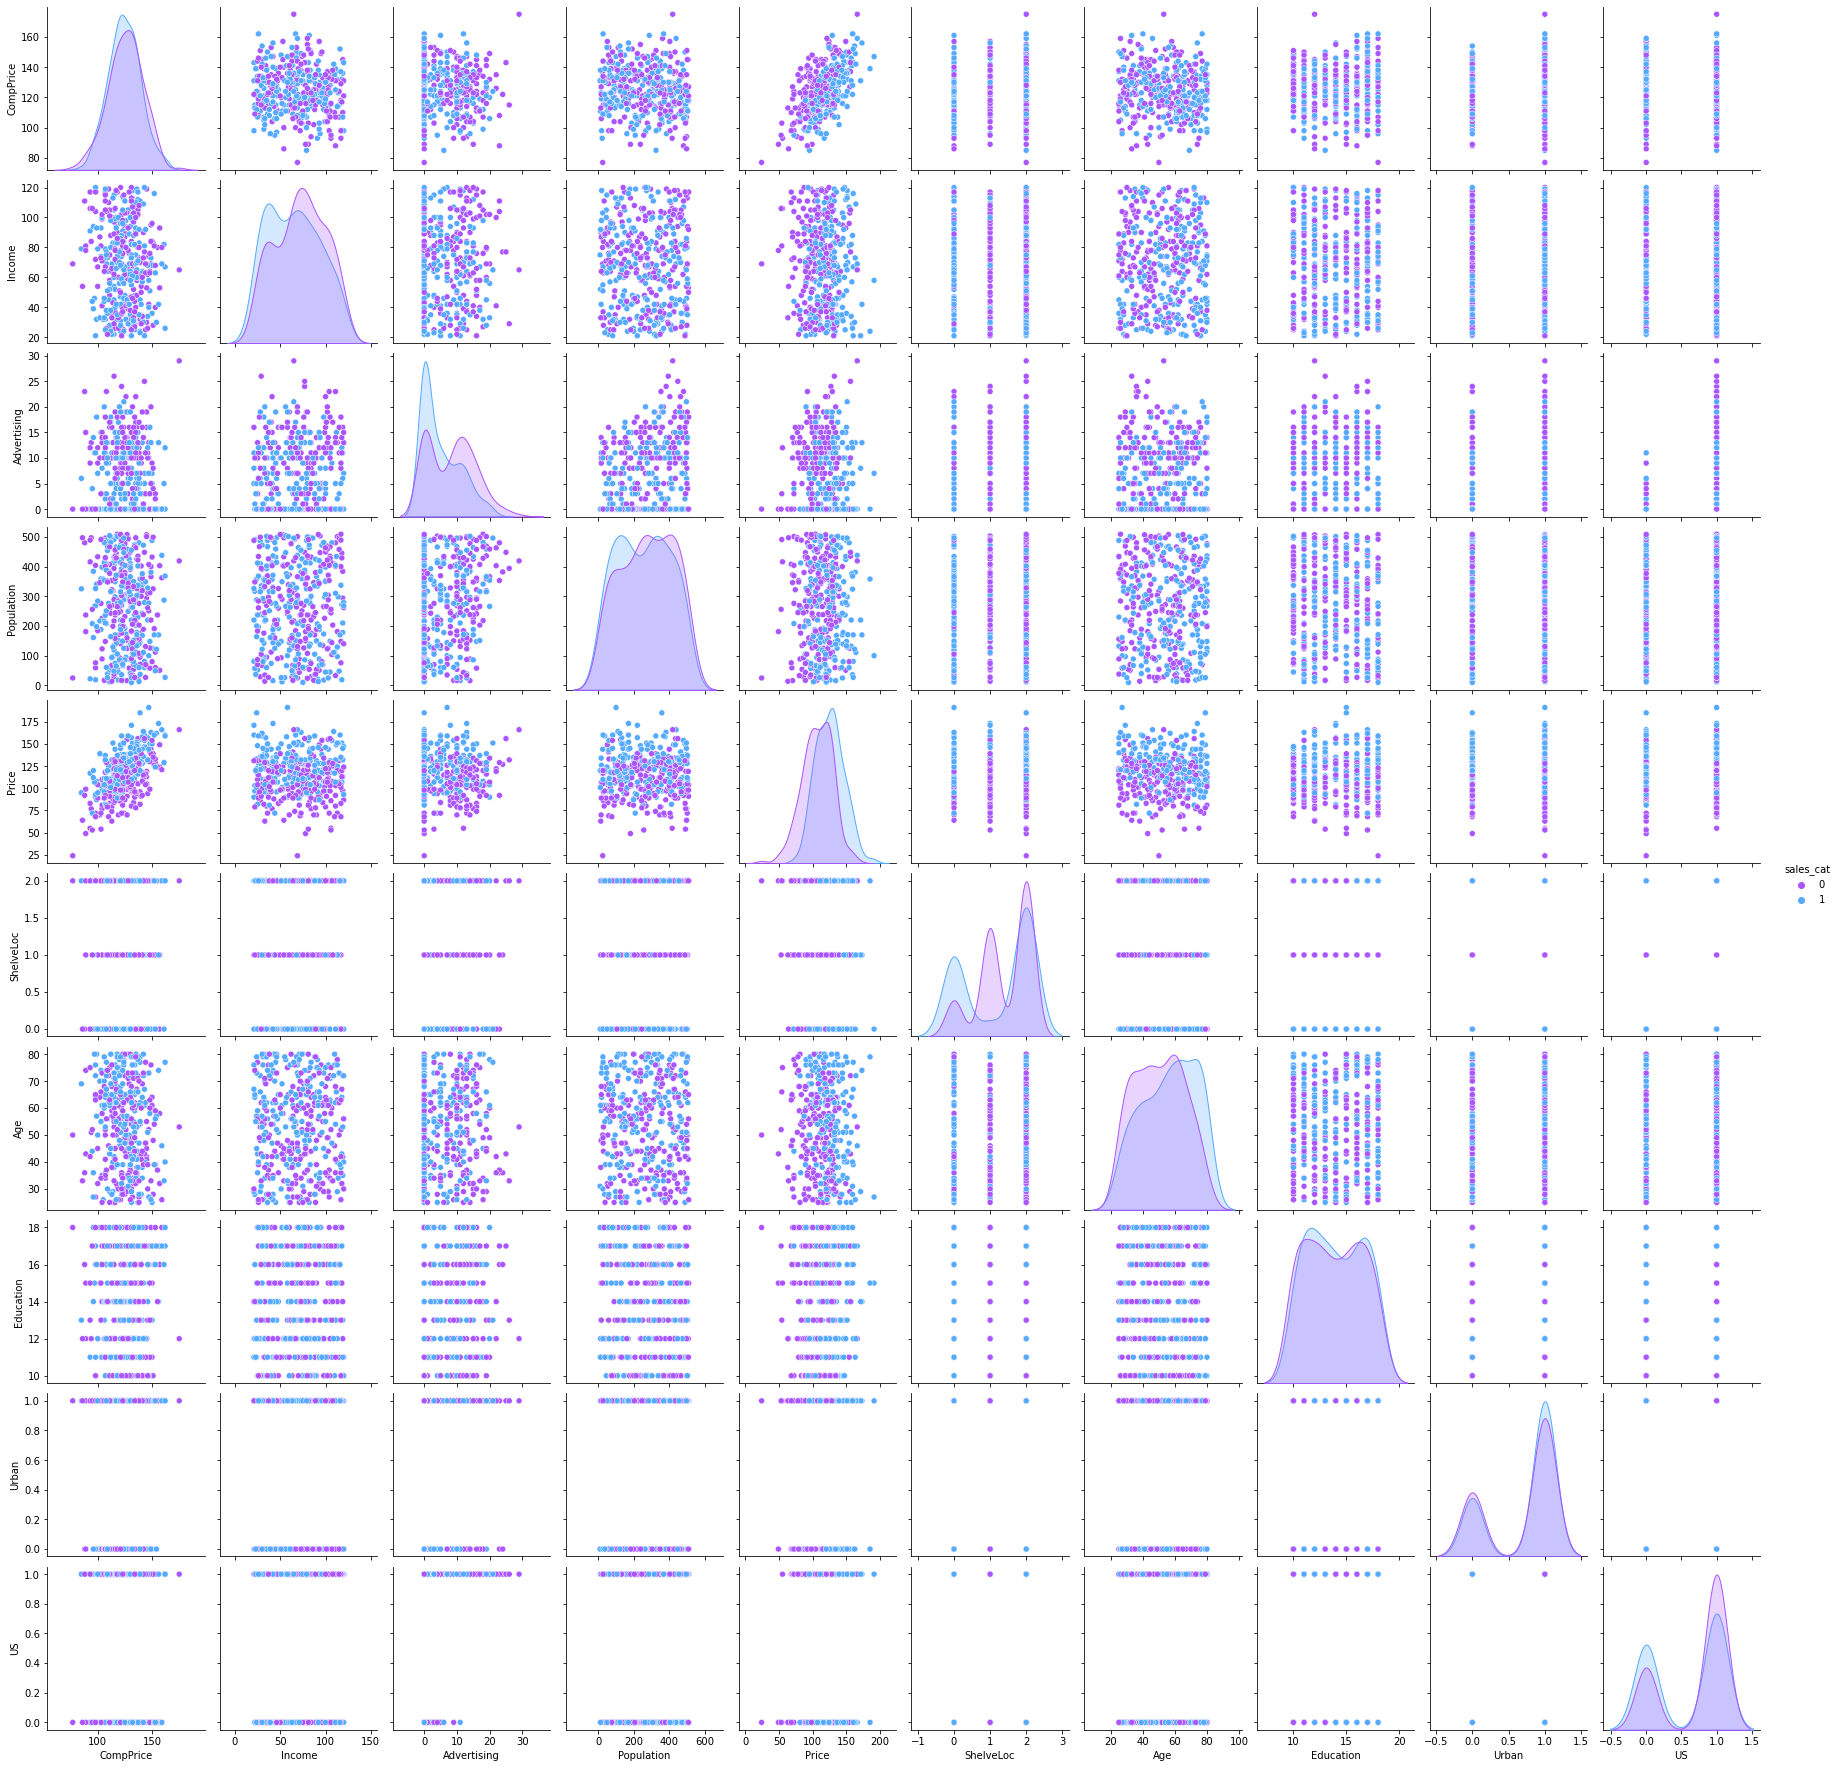

In [10]:
sns.pairplot(df, hue = 'sales_cat', palette = 'cool_r');

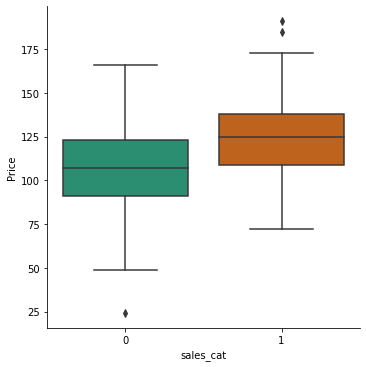

In [11]:
sns.catplot(x = 'sales_cat', y = 'Price', data = df, kind = 'box', palette = 'Dark2');

# DecisionTreeClassifier Class

In [12]:
X = df.iloc[:, :-1].values
y = df.sales_cat.values

We do a train/test split using a random_state so that every time we run the code we will get the same split.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [14]:
# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier()

In [15]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
dt_y_pred = model.predict(X_test)

* Evaluating the model

In [17]:
print("Decision Tree")
print("  accuracy:", model.score(X_test, y_test))
print("  precision:", precision_score(y_test, dt_y_pred))
print("  recall:", recall_score(y_test, dt_y_pred))

Decision Tree
  accuracy: 0.63
  precision: 0.5849056603773585
  recall: 0.6739130434782609


# Pruning the Tree

* To determine the best values for the pre-pruning parameters, we’ll use cross validation to compare several potential options.

In [18]:
# Grid Search
param_grid = {
    'max_depth': [25, 30, 35], # Limiting the depth
    'min_samples_leaf': [1, 3], # Avoiding leaves with few datapoints
    'max_leaf_nodes': [25, 30, 35]} # Limiting the number of leaf nodes

dt = DecisionTreeClassifier()

gs = GridSearchCV(dt, param_grid, scoring = 'f1', cv = 5)
gs.fit(X, y)

print("Best Parameters:", gs.best_params_) # The best_params_ attribute to see which model won.
print("Best Score:", gs.best_score_) # The best_score_ attribute tells the score of the winning model.

Best Parameters: {'max_depth': 30, 'max_leaf_nodes': 30, 'min_samples_leaf': 1}
Best Score: 0.7357989144598724


# Gini vs Entropy

In [19]:
max_depth = gs.best_params_['max_depth']
max_leaf_nodes = gs.best_params_['max_leaf_nodes']
min_samples_leaf = gs.best_params_['min_samples_leaf']

kf = KFold(n_splits = 5, shuffle = True)

for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Creating DecisionTreeClassifier object
        dt = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, 
                                    max_leaf_nodes = max_leaf_nodes, 
                                    min_samples_leaf = min_samples_leaf)
        
        # Train the model
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict(X_test)
        
        # Scoring the Decision Tree Model
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall), '\n')

Decision Tree - gini
accuracy: 0.745
precision: 0.7501613483101004
recall: 0.7686405411484944 

Decision Tree - entropy
accuracy: 0.7325
precision: 0.7231965887130046
recall: 0.7614291036984568 



We see very little difference in the performance of Gini vs Entropy. This is expected as they aren’t really very different functions.

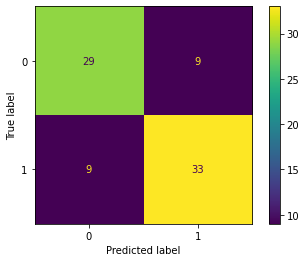

In [20]:
plot_confusion_matrix(dt, X_test, y_test);

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.79      0.79      0.79        42

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.78      0.78      0.78        80



In [22]:
pd.DataFrame(index = df.iloc[:, :-1].columns, data = model.feature_importances_, 
             columns = ['Feature Importance'])

,Feature Importance
CompPrice,0.154810
Income,0.120632
Advertising,0.160681
Population,0.079916
Price,0.253275
ShelveLoc,0.114547
Age,0.055609
Education,0.060530
Urban,0.000000
US,0.000000


# Visualizing Decision Trees

In [23]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

In [24]:
dt = DecisionTreeClassifier(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes, 
                            min_samples_leaf = min_samples_leaf)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=30)

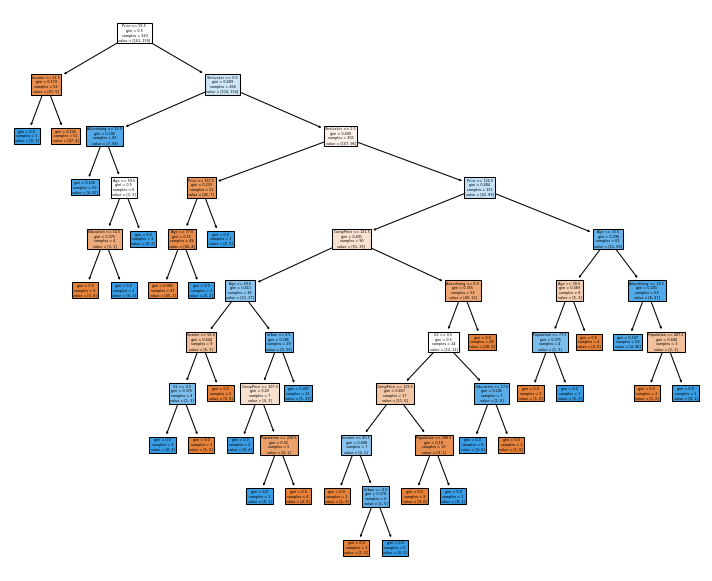

In [25]:
plt.figure(figsize = (12, 10), dpi = 75)
plot_tree(dt, filled = True, feature_names = df.iloc[:, :-1].columns);